In [1]:
import cv2
import os
from matplotlib import pyplot as plt


In [2]:

def preprocess_image(img):
    # 1. grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. brightness +30
    bright = cv2.convertScaleAbs(gray, alpha=1.0, beta=30)

    # 3. Otsu binary threshold
    _, binary = cv2.threshold(bright, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return gray, bright, binary



In [3]:
import cv2
import os


In [4]:
def process_folder(input_dir, output_dir):
    # create folder if not exists
    os.makedirs(output_dir, exist_ok=True)

    for filename in os.listdir(input_dir):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp")):
            path = os.path.join(input_dir, filename)
            img = cv2.imread(path)

            if img is None:
                continue

            gray, bright, binary = preprocess_image(img)

            # save outputs
            cv2.imwrite(os.path.join(output_dir, f"{filename}_gray.png"), gray)
            cv2.imwrite(os.path.join(output_dir, f"{filename}_bright.png"), bright)
            cv2.imwrite(os.path.join(output_dir, f"{filename}_binary.png"), binary)

            print(f"Przetworzono: {filename}")

In [ ]:
# --- MAIN ---

process_folder("data/healthy", "output/healthy")
process_folder("data/cancer", "output/cancer")

Przetworzono: UID_11_10_1_all.bmp
Przetworzono: UID_11_14_1_all.bmp
Przetworzono: UID_11_22_2_all.bmp
Przetworzono: UID_11_2_1_all.bmp
Przetworzono: UID_11_5_4_all.bmp
Przetworzono: UID_13_10_1_all.bmp
Przetworzono: UID_13_10_2_all.bmp
Przetworzono: UID_13_11_1_all.bmp
Przetworzono: UID_13_12_1_all.bmp
Przetworzono: UID_13_12_2_all.bmp
Przetworzono: UID_13_12_3_all.bmp
Przetworzono: UID_13_14_1_all.bmp
Przetworzono: UID_13_14_2_all.bmp
Przetworzono: UID_13_14_3_all.bmp
Przetworzono: UID_13_15_1_all.bmp
Przetworzono: UID_13_17_2_all.bmp
Przetworzono: UID_13_18_1_all.bmp
Przetworzono: UID_13_19_1_all.bmp
Przetworzono: UID_13_1_1_all.bmp
Przetworzono: UID_14_14_1_all.bmp
Przetworzono: UID_16_12_2_all.bmp
Przetworzono: UID_16_16_1_all.bmp
Przetworzono: UID_16_20_1_all.bmp
Przetworzono: UID_16_6_3_all.bmp
Przetworzono: UID_23_28_2_all.bmp
Przetworzono: UID_11_11_1_all.bmp
Przetworzono: UID_11_11_2_all.bmp
Przetworzono: UID_11_11_3_all.bmp
Przetworzono: UID_11_16_3_all.bmp
Przetworzono: UID_

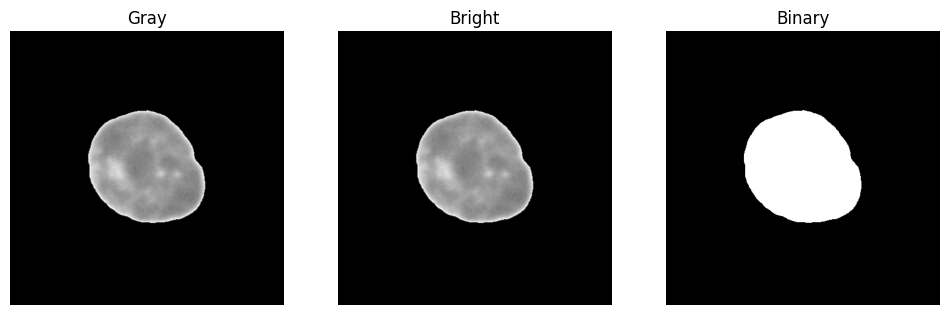

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("data/healthy/UID_11_5_4_all.bmp")
gray, bright, binary = preprocess_image(img)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Gray")
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Bright")
plt.imshow(bright, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Binary")
plt.imshow(binary, cmap="gray")
plt.axis("off")

plt.show()


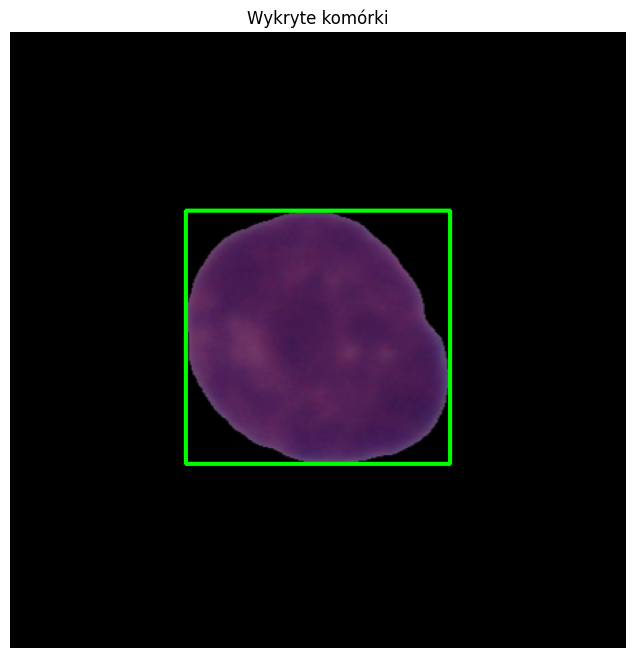

Liczba wykrytych komórek: 1


In [7]:
# zakładam, że masz już: img, gray, bright, binary

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = img.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(output, (x,y), (x+w, y+h), (0,255,0), 2)

plt.figure(figsize=(8,8))
plt.title("Wykryte komórki")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Liczba wykrytych komórek:", len(contours))
